<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Estatísticas-Descritivas" data-toc-modified-id="Estatísticas-Descritivas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Estatísticas Descritivas</a></span><ul class="toc-item"><li><span><a href="#Geyser-dataset" data-toc-modified-id="Geyser-dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Geyser dataset</a></span></li></ul></li><li><span><a href="#Localização" data-toc-modified-id="Localização-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Localização</a></span></li><li><span><a href="#Dispersão" data-toc-modified-id="Dispersão-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dispersão</a></span><ul class="toc-item"><li><span><a href="#Desvio-padrão" data-toc-modified-id="Desvio-padrão-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Desvio padrão</a></span></li><li><span><a href="#IQR-(Amplitude-interquartil)" data-toc-modified-id="IQR-(Amplitude-interquartil)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>IQR (Amplitude interquartil)</a></span></li></ul></li><li><span><a href="#Vizualizando-localização/dispersão" data-toc-modified-id="Vizualizando-localização/dispersão-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Vizualizando localização/dispersão</a></span><ul class="toc-item"><li><span><a href="#Simulando-dados" data-toc-modified-id="Simulando-dados-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Simulando dados</a></span></li><li><span><a href="#Diferença-de-localização" data-toc-modified-id="Diferença-de-localização-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Diferença de localização</a></span></li><li><span><a href="#Diferença-de-dispersão" data-toc-modified-id="Diferença-de-dispersão-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Diferença de dispersão</a></span></li><li><span><a href="#Vizualizando-Indicadores-Robustos" data-toc-modified-id="Vizualizando-Indicadores-Robustos-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Vizualizando Indicadores Robustos</a></span></li></ul></li><li><span><a href="#VOLTAMOS-21H05" data-toc-modified-id="VOLTAMOS-21H05-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>VOLTAMOS 21H05</a></span></li></ul></div>

# Estatísticas Descritivas

Uma das principais ferramentas na investigação de um conjunto de dados são as **estatísticas descritivas**. Estatísticas descritivas são **funções** (no sentido matemático) que resumem um vetor de dados (por exemplo, uma coluna do Pandas) em **um número**. O exemplo clássico de estatística descrita é a **média**: dado um conjunto de observações (alturas de indivíduos), podemos calcular a **altura média** desses indivíduos.



Além de serem úteis na exploração de um conjunto de dados, as estatísticas descritivas nos permitem fazer **inferências** sobre uma população a partir de uma amostra dessa população: 

> Um cientista político deseja descobrir como a população de um país se sente com relação à diferentes candidatos em uma eleição, pedindo que cada pessoa de uma nota de 0 à 10 para cada candidato. Obviamente, este cientista não tem como entrevistar todas as pessoas de um país, ele precisará conduzir sua entrevista para uma amostra da população. A **inferência estatística** nos permite estimar as estatísticas descritivas de uma população a partir dessas mesmas estatísticas em uma amostra. Desta forma, o cientista poderá **estimar**, com grau de confiabilidade conhecido, as opções da população como um todo a partir de uma amostra aleatória.

A **inferência estatística** nos permite estimar dados de uma população através de observações conduzidas sobre uma amostra. O caminho reverso, a **amostragem**, nos permite criar observações a partir de uma população conhecida. Este tipo de análise é usado predominantemente de duas: 

1. **DOEs** (*design of experiments*): utilizamos estimativas dos parâmetros de uma população para criar uma estratégia de amostragem em um experimento;
    * No exemplo acima, o cientista político precisa calcular o grau de confiabilidade para diferentes tamanhos de amostra.
1. **Simulação de Monte Carlo**: utilizamos estimativas dos parâmetros de uma população para simular um processo.
    * Podemos utilizar parâmetros mensurados em um cruzamento para simular como diferentes volumetrias de carro podem impactar o trânsito em uma avênida.

![image.png](images/inference.png)

## Geyser dataset

Vamos analisar como diferentes estatísticas descritivas podem ser utilizadas e quando devemos evitar uma ou outra medida. Para essa aula utilizaremos o conjunto de dados `Geyser` que contém três variáveis relacionadas à erupções do geiser *Old Faithful* no parque de Yellowstone nos EUA:

1. O tempo desde a última erupção (variável continua);
1. A duração da erupção (variável continua);
1. O tipo de erupção (variável discreta).

Fonte: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/faithful.html

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [5]:
tb_geyser = sns.load_dataset('geyser')

In [6]:
tb_geyser.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


In [7]:
tb_geyser.describe()

,duration,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


## Localização

As primeiras estatísticas descritivas de hoje serão as as **medidas de localização** (ou *medidas de altura*). Essas medidas nos permitem estimar ao redor que qual ponto uma distribuição se concentram. Focaremos nossa análise em três medidas específicas:

1. **Média** (ou *esperança*);
1. **Mediana** (o *segundo quartil*);
1. **Moda**

### Média

A **média** é a medida de localização mais conhecida (e, provavelmente, o conceito estatístico mais difundido). Ela é definida como a somatória de todas as observações divida pelo número de observações e, na estatítisca, é comunmente representada pela letra Mu:

$$\mu=\frac{\sum_{i=1}^n x_{i}}{n} $$

Vamos começar construindo uma função para calcular a média:


In [8]:
def meu_mu(vetor):
    total = sum(vetor)
    numero_elementos = len(vetor)
    media = total/numero_elementos
    return media

In [11]:
meu_mu(tb_geyser['waiting'])

70.8970588235294

Podemos utilizar a função `mean()` para calcular a média de qualquer iterável numérico no Python:

In [12]:
np.mean(tb_geyser['waiting'])

70.8970588235294

ou então podemos utilizar o método `.mean()` para calcular a média de uma (ou mais) colunas de um `DataFrame`:

In [8]:
tb_geyser['waiting'].mean()

3.4877830882352936

In [13]:
tb_geyser[['waiting','duration']].mean()

waiting     70.897059
duration     3.487783
dtype: float64

#### Limitações da Média

In [10]:
a = [1, 1, 1, 2, 1, 1, 1, 2,1, 1, 1, 2,1, 1, 1, 2,10000]
np.mean(a)

589.4117647058823

In [12]:
len(a)

17

In [13]:
10000/17

588.2352941176471

In [14]:
def minha_mediana(vetor):
    vetor_ordenado = sorted(list(vetor))
    posicao_meio = int(len(vetor_ordenado)/2)
    mediana = vetor_ordenado[posicao_meio]
    return mediana

In [15]:
minha_mediana(a)

1

In [16]:
minha_mediana(tb_geyser['duration'])

4.0

In [17]:
tb_geyser['duration'].median()

4.0

In [18]:
np.median(tb_geyser['duration'])

4.0

In [19]:
tb_geyser.groupby('kind').mean()

,duration,waiting
kind,,
long,4.29793,80.284884
short,2.09433,54.750000


In [20]:
tb_geyser.groupby('kind').median()

,duration,waiting
kind,,
long,4.350,80
short,1.983,54


In [21]:
tb_geyser.groupby('kind').agg(
    duration_avg = pd.NamedAgg('duration', 'mean'),
    duration_med = pd.NamedAgg('duration', 'median'),
    waiting_avg = pd.NamedAgg('waiting', 'mean'),
    waiting_med = pd.NamedAgg('waiting', 'median'),
)

,duration_avg,duration_med,waiting_avg,waiting_med
kind,,,,
long,4.29793,4.350,80.284884,80
short,2.09433,1.983,54.750000,54


# Dispersão

## Desvio padrão

In [22]:
tb_geyser['duration_desvio'] = tb_geyser['duration'] - np.mean(tb_geyser['duration'])

In [23]:
tb_geyser['duration_desvio']

0      0.112217
1     -1.687783
2     -0.154783
3     -1.204783
4      1.045217
         ...   
267    0.629217
268   -1.337783
269    0.929217
270   -1.670783
271    0.979217
Name: duration_desvio, Length: 272, dtype: float64

In [24]:
tb_geyser['duration_desvio'].mean()

5.869487902246232e-16

In [25]:
tb_geyser['duration_desvio_quadrado'] = tb_geyser['duration_desvio'] ** 2

In [26]:
tb_geyser['duration_desvio_quadrado']

0      0.012593
1      2.848612
2      0.023958
3      1.451502
4      1.092478
         ...   
267    0.395914
268    1.789664
269    0.863444
270    2.791516
271    0.958866
Name: duration_desvio_quadrado, Length: 272, dtype: float64

In [27]:
tb_geyser['duration_desvio_quadrado'].mean()

1.2979388904492855

In [28]:
np.sqrt(tb_geyser['duration_desvio_quadrado'].mean())

1.1392712102257678

In [ ]:
np.std(tb_geyser['duration'])

## IQR (Amplitude interquartil)

In [29]:
dur_mediana = np.median(tb_geyser['duration'])

In [30]:
dur_p25 = np.quantile(tb_geyser['duration'], 0.25)
print(dur_p25)

2.16275


In [31]:
dur_p75 = np.quantile(tb_geyser['duration'], 0.75)
print(dur_p75)

4.45425


In [32]:
print(dur_p75 - dur_p25)

2.2915


In [ ]:
def iqr(vetor):
    dur_p25 = np.quantile(vetor, 0.25)
    dur_p75 = np.quantile(vetor, 0.75)
    return dur_p75 - dur_p25

# Vizualizando localização/dispersão

## Simulando dados

In [34]:
mu_0_sd_1 = np.random.normal(0, 1, 1000)
mu_0_sd_2 = np.random.normal(0, 2, 1000)
mu_2_sd_1 = np.random.normal(2, 1, 1000)

## Diferença de localização

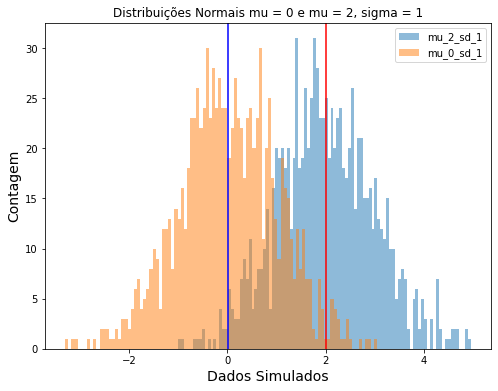

In [35]:
plt.figure(figsize=(8,6));
plt.hist(mu_2_sd_1, bins=100, alpha=0.5, label="mu_2_sd_1");
plt.hist(mu_0_sd_1, bins=100, alpha=0.5, label="mu_0_sd_1");
plt.axvline(np.mean(mu_0_sd_1), color = 'blue');
plt.axvline(np.mean(mu_2_sd_1), color = 'red');
plt.xlabel("Dados Simulados", size=14)
plt.ylabel("Contagem", size=14);
plt.title("Distribuições Normais mu = 0 e mu = 2, sigma = 1");
plt.legend(loc='upper right');

## Diferença de dispersão

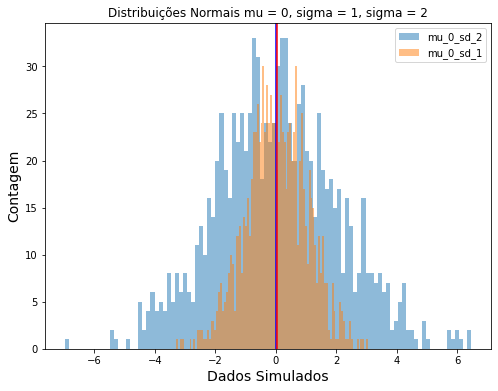

In [37]:
plt.figure(figsize=(8,6));
plt.hist(mu_0_sd_2, bins=100, alpha=0.5, label="mu_0_sd_2");
plt.hist(mu_0_sd_1, bins=100, alpha=0.5, label="mu_0_sd_1");
plt.axvline(np.mean(mu_0_sd_1), color = 'blue');
plt.axvline(np.mean(mu_0_sd_2), color = 'red');
plt.xlabel("Dados Simulados", size=14)
plt.ylabel("Contagem", size=14);
plt.title("Distribuições Normais mu = 0, sigma = 1, sigma = 2");
plt.legend(loc='upper right');

## Vizualizando Indicadores Robustos

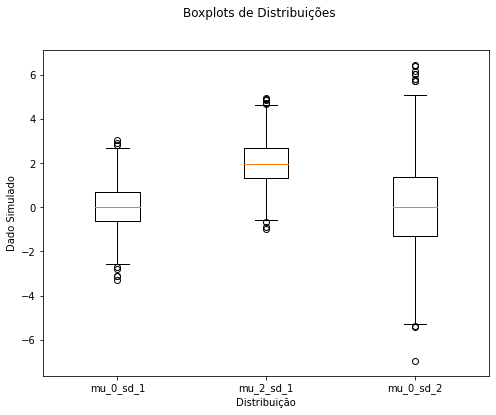

In [38]:
plt.figure(figsize=(8,6));
plt.boxplot([mu_0_sd_1, mu_2_sd_1, mu_0_sd_2],
           labels = ['mu_0_sd_1', 'mu_2_sd_1', 'mu_0_sd_2']);
plt.ylabel('Dado Simulado');
plt.xlabel('Distribuição');
plt.suptitle('Boxplots de Distribuições');

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (18,9))
sns.boxplot(data = tb_geyser, y = 'duration', x = 'kind', ax = axes[0])
sns.boxplot(data = tb_geyser, y = 'duration', ax = axes[1])
plt.xlabel('Total')
plt.suptitle('Duração de Erupção Total e por Tipo de Geyser')

# VOLTAMOS 21H05